# 00 Training and evaluating a DNN model on the IMDB Dataset
## Downloading and data preprocessing

Downloaded the dataset at http://ai.stanford.edu/~amaas/data/sentiment/

```
@InProceedings{maas-EtAl:2011:ACL-HLT2011,
  author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
  title     = {Learning Word Vectors for Sentiment Analysis},
  booktitle = {Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies},
  month     = {June},
  year      = {2011},
  address   = {Portland, Oregon, USA},
  publisher = {Association for Computational Linguistics},
  pages     = {142--150},
  url       = {http://www.aclweb.org/anthology/P11-1015}
}
```

In [47]:
%time

import os
import pandas as pd

df = pd.DataFrame(columns = ['text','sentiment'])

imdb_dir = "./datasets/aclImdb"

for dir_kind in ['train','test']:
    for label_type in ['neg', 'pos']:
        dir_name = os.path.join(imdb_dir, dir_kind, label_type)
        for fname in os.listdir(dir_name):
            if fname[-4:] == '.txt':
                f = open(os.path.join(dir_name, fname))
                df = df.append({'text': f.read(), 'sentiment': ['neg','pos'].index(label_type)}, ignore_index = True)
                f.close()

CPU times: user 21 µs, sys: 1 µs, total: 22 µs
Wall time: 39.1 µs


In [48]:
df.head()

,text,sentiment
0,I am quite a fan of novelist/screenwriter Mich...,0
1,If this book remained faithful to the book the...,0
2,The Eternal Jew (Der Ewige Jude) does not have...,0
3,Here are the matches . . . (adv. = advantage)<...,0
4,I'm sorry but I didn't like this doc very much...,0


In [49]:
print ('Number of negative istances:', len(df[df['sentiment'] == 0]))
print ('Number of positive istances:', len(df[df['sentiment'] == 1]))
print ('Il dataset risulta essere bilanciato!')

Number of negative istances: 25000
Number of positive istances: 25000
Il dataset risulta essere bilanciato!


In [50]:
print(df['text'][0])

I am quite a fan of novelist/screenwriter Michael Chabon. His novel "Wonder Boys" became a fantastic movie by Curtis Hanson. His masterful novel "The Amazing Adventures of Kavalier and Clay" won the Pulitzer Prize a few years back, and he had a hand in the script of "Spider Man 2", arguably the greatest comic book movie of all time.<br /><br />Director Rawson Marshall Thurber has also directed wonderful comedic pieces, such as the gut-busting "Dodgeball" and the genius short film series "Terry Tate: Office Linebacker". And with a cast including Peter Saarsgard, Sienna Miller, Nick Nolte and Mena Suvari, this seems like a no-brainer.<br /><br />It is. Literally.<br /><br />Jon Foster stars as Art Bechstein, the son of a mobster (Nolte) who recently graduated with a degree in Economics. Jon is in a state of arrested development: he works a minimum wage job at Book Barn, has a vapid relationship with his girlfriend/boss, Phlox (Suvari), which amounts to little more than copious amounts of

In [57]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    return BeautifulSoup(text, 'lxml').text

In [58]:
remove_html_tags(df['text'][0])

'I am quite a fan of novelist/screenwriter Michael Chabon. His novel "Wonder Boys" became a fantastic movie by Curtis Hanson. His masterful novel "The Amazing Adventures of Kavalier and Clay" won the Pulitzer Prize a few years back, and he had a hand in the script of "Spider Man 2", arguably the greatest comic book movie of all time.Director Rawson Marshall Thurber has also directed wonderful comedic pieces, such as the gut-busting "Dodgeball" and the genius short film series "Terry Tate: Office Linebacker". And with a cast including Peter Saarsgard, Sienna Miller, Nick Nolte and Mena Suvari, this seems like a no-brainer.It is. Literally.Jon Foster stars as Art Bechstein, the son of a mobster (Nolte) who recently graduated with a degree in Economics. Jon is in a state of arrested development: he works a minimum wage job at Book Barn, has a vapid relationship with his girlfriend/boss, Phlox (Suvari), which amounts to little more than copious amounts of sex, with no plans other than to c

In [59]:
df['text'] = df['text'].apply(lambda x: remove_html_tags(x))

In [60]:
df.head()

,text,sentiment
0,I am quite a fan of novelist/screenwriter Mich...,0
1,If this book remained faithful to the book the...,0
2,The Eternal Jew (Der Ewige Jude) does not have...,0
3,Here are the matches . . . (adv. = advantage)T...,0
4,I'm sorry but I didn't like this doc very much...,0


## Creating the DNN Model

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

x_train, x_val, y_train, y_val = train_test_split(df['text'], df['sentiment'], test_size = 0.33, shuffle = True)

x_train = list(x_train)
x_val = list(x_val)

y_train = list(y_train)
y_val = list(y_val)

In [216]:
y_val

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,


In [219]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
texts = x_train + x_val
tokenizer.fit_on_texts(texts)

maxlen = max([len(t.split()) for t in texts])

words_size = len(tokenizer.word_index) + 1

train_sequences = tokenizer.texts_to_sequences(x_train)
val_sequences = tokenizer.texts_to_sequences(x_val)

print('Found %s unique tokens.' % len(tokenizer.word_index))

train_data = pad_sequences(train_sequences, maxlen = maxlen)
val_data = pad_sequences(val_sequences, maxlen = maxlen)

y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
print('Shape of train data tensor:', train_data.shape)
print('Shape of train label tensor:', y_train.shape)

print('Shape of validation data tensor:', val_data.shape)
print('Shape of validation label tensor:', y_val.shape)


Found 126505 unique tokens.
Shape of train data tensor: (33500, 2450)
Shape of train label tensor: 33500
Shape of validation data tensor: (16500, 2450)
Shape of validation label tensor: 16500


In [220]:
val_data

array([[   0,    0,    0, ...,   46,  125,  156],
       [   0,    0,    0, ...,  195,   38,   67],
       [   0,    0,    0, ...,    4,   91, 3295],
       ...,
       [   0,    0,    0, ..., 1096,   10,   16],
       [   0,    0,    0, ...,  238,  358,  192],
       [   0,    0,    0, ...,  283,   14,   11]], dtype=int32)

In [222]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [223]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

EMBEDDING_DIM = 100

model = Sequential()
model.add(Embedding(words_size, EMBEDDING_DIM, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 2450, 100)         12650600  
_________________________________________________________________
flatten_13 (Flatten)         (None, 245000)            0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                7840032   
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 20,490,665
Trainable params: 20,490,665
Non-trainable params: 0
_________________________________________________________________


In [224]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_data, y_train,
                    epochs=25,
                    batch_size=128,
                    validation_data=(val_data, y_val))

Epoch 1/25
262/262 [==============================] - 68s 258ms/step - loss: 0.8348 - acc: 0.5021 - val_loss: 0.6910 - val_acc: 0.5070
Epoch 2/25
262/262 [==============================] - 68s 260ms/step - loss: 0.4126 - acc: 0.7973 - val_loss: 0.2564 - val_acc: 0.8982
Epoch 3/25
262/262 [==============================] - 67s 255ms/step - loss: 0.1548 - acc: 0.9397 - val_loss: 0.2664 - val_acc: 0.8977
Epoch 4/25
262/262 [==============================] - 66s 251ms/step - loss: 0.0498 - acc: 0.9835 - val_loss: 0.3197 - val_acc: 0.8908
Epoch 5/25
262/262 [==============================] - 69s 265ms/step - loss: 0.0176 - acc: 0.9945 - val_loss: 0.3928 - val_acc: 0.8935
Epoch 6/25
262/262 [==============================] - 66s 253ms/step - loss: 0.0052 - acc: 0.9982 - val_loss: 0.4966 - val_acc: 0.8934
Epoch 7/25
262/262 [==============================] - 66s 251ms/step - loss: 0.0138 - acc: 0.9966 - val_loss: 0.5437 - val_acc: 0.8927
Epoch 8/25
262/262 [==============================] - 6

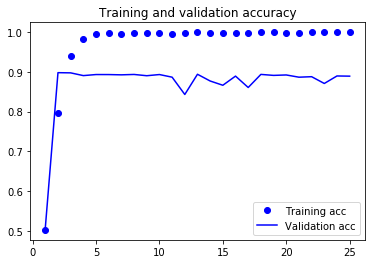

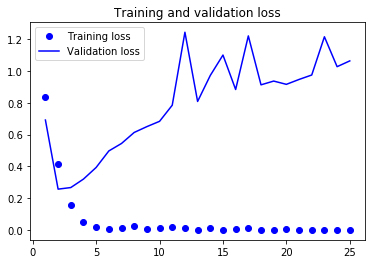

In [225]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()